In [2]:
# Permet au notebook de trouver ton dossier 'src'
import sys
import os
sys.path.append(os.path.abspath('.'))

from src.pipeline import SynesthesiaPipeline

# Indique le chemin de ton modèle entraîné
CHECKPOINT = "data/checkpoints/synesthesia_epoch_2.pt"

# On instancie l'objet (ça va prendre 1-2 minutes pour charger les modèles en RAM)
synesthesia = SynesthesiaPipeline(checkpoint_path=CHECKPOINT)

c:\Users\rapha\Projects_CSC\Synesthesia\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\rapha\Projects_CSC\Synesthesia\venv\Lib\site-packages\diffusers\models\transformers\transformer_kandinsky.py:168: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)
c:\Users\rapha\Projects_CSC\Synesthesia\venv\Lib\site-packages\diffusers\models\transformers\transformer_kandinsky.py:272: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)


⚙️ Initializing Synesthesia Pipeline on cpu...
👁️ Loading Vision Model...
[INFO] Loading Image Encoder: openai/clip-vit-base-patch32...


Loading weights: 100%|██████████| 199/199 [00:00<00:00, 2083.79it/s, Materializing param=vision_model.pre_layrnorm.weight]                        
CLIPVisionModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                                          | Status     |  | 
-------------------------------------------------------------+------------+--+-
text_model.encoder.layers.{0...11}.self_attn.v_proj.bias     | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.self_attn.q_proj.bias     | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.mlp.fc1.bias              | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.layer_norm2.bias          | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.self_attn.q_proj.weight   | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.mlp.fc2.weight            | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.layer_norm1.bias          | UNEXPECTED |  | 
text_model.encoder.layers.{0...11}.mlp.fc1.weight            | UNEXPEC

🎹 Loading Audio Synthesizer (AudioLDM)...


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]
The AudioLDMPipeline has been deprecated and will not receive bug fixes or feature updates after Diffusers version 0.33.1. 


✅ Pipeline ready!


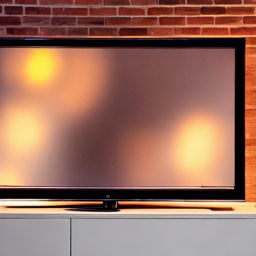

Génération en cours...


100%|██████████| 15/15 [00:11<00:00,  1.28it/s]


In [4]:
from IPython.display import Audio, display
from PIL import Image

# 1. Choisis une image
ma_photo = "data/synthetic/images/sample_0000.png"

# (Optionnel) Afficher l'image dans le notebook
display(Image.open(ma_photo).resize((256, 256)))

# 2. Générer le son avec ton objet
print("Génération en cours...")
audio_array, sample_rate = synesthesia.generate(image_input=ma_photo, steps=15, duration=15.0)

# 3. Créer un lecteur audio directement dans le notebook ! 🎧
display(Audio(audio_array, rate=sample_rate))